In [1]:
from accelerator import Lattice
from accelerator.elements import Drift
from accelerator import Beam
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = Drift(1)

In [3]:
lat = Lattice([d])

In [4]:
u, u_prime, s = lat.transport([1, 1])

In [5]:
u

array([1., 2.])

In [6]:
u_prime

array([1., 1.])

In [7]:
b, a, g, s = lat.transport([1, 0, 1])

In [8]:
b

array([1., 2.])

In [9]:
a

array([ 0., -1.])

In [10]:
s

array([0, 1])

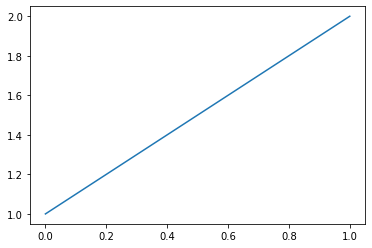

In [11]:
plt.plot(s, u)

In [12]:
beam = Beam()

In [13]:
u, u_prime = beam.phasespace([1,0,1])

In [14]:
u.shape

(1000,)

In [15]:
u_prime.shape

(1000,)

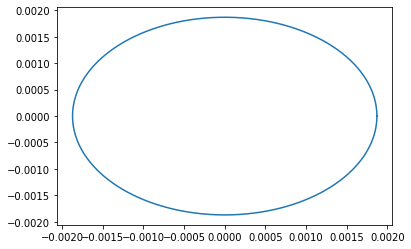

In [16]:
plt.plot(u, u_prime)

In [20]:
u, u_prime, s = lat.transport(beam.phasespace([1,0,1]))

In [21]:
u.shape

(1000, 2)

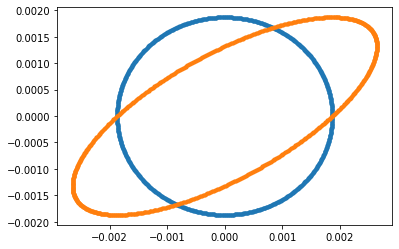

In [22]:
plt.plot(u, u_prime, linewidth=0, marker='.')